<a href="https://colab.research.google.com/github/dtzcb2k/API_server/blob/master/Qlearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.11/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.11/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32317 (\N{CJK UNIFIED IDEOGRAPH-7E3D}) missing from font(s) DejaVu Sans.
  fig.canva

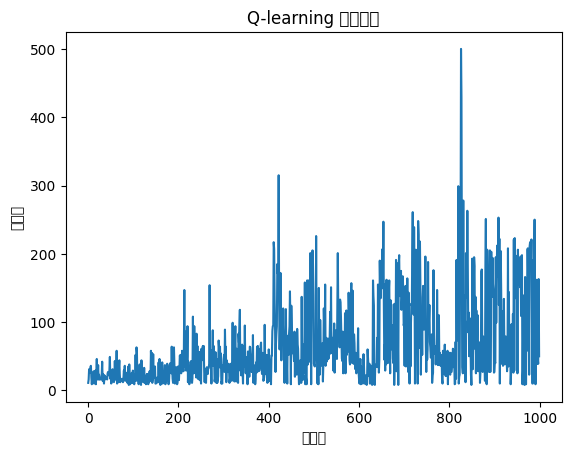

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt

# 初始化環境
env = gym.make('CartPole-v1')

# 定義離散化數量
num_bins = (6, 6, 6, 6)  # 為每個狀態維度劃分 6 個區間
action_space = env.action_space.n

# 初始化 Q-table
q_table = np.zeros(num_bins + (action_space,))

# 參數設置
alpha = 0.1  # 學習率
gamma = 0.99  # 折扣因子
epsilon = 1.0  # 探索率
epsilon_decay = 0.995  # 探索率衰減
epsilon_min = 0.01  # 最小探索率
episodes = 1000  # 訓練回合數

# 離散化狀態函數
def discretize_state(state, bins):
    state_low = env.observation_space.low
    state_high = env.observation_space.high

    # 限制狀態範圍，避免超出界限
    state = np.clip(state, state_low, state_high)

    bins_ranges = [np.linspace(state_low[i], state_high[i], bins[i] - 1) for i in range(len(bins))]

    return tuple(np.digitize(state[i], bins_ranges[i]) for i in range(len(bins)))

# 記錄每回合的總獎勵
total_rewards = []

for episode in range(episodes):
    state = env.reset()  # Gym 新版 reset() 會回傳 (obs, info)
    state = discretize_state(state, num_bins)  # 離散化狀態
    done = False
    total_reward = 0

    while not done:
        # ε-greedy 策略
        if np.random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()  # 探索
        else:
            action = np.argmax(q_table[state])  # 利用

        # 執行動作
        next_state, reward, done, _ = env.step(action)
        next_state = discretize_state(next_state, num_bins)
        total_reward += reward

        # 更新 Q-table
        best_future_q = np.max(q_table[next_state])
        q_table[state][action] += alpha * (reward + gamma * best_future_q - q_table[state][action])

        state = next_state

    # 記錄獎勵
    total_rewards.append(total_reward)

    # 更新 ε
    epsilon = max(epsilon_min, epsilon * epsilon_decay)

# 繪圖
plt.plot(range(episodes), total_rewards)
plt.xlabel('回合數')
plt.ylabel('總獎勵')
plt.title('Q-learning 訓練結果')
plt.show()
